# TES TRAININ DENGAN DATASET DARI KAGKLE #
## LINK : ##
### https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset ###

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Path ke folder dataset
train_dir = 'extracted_data/Data Penyakit/train'
validation_dir = 'extracted_data/Data Penyakit/valid'

In [ ]:
# Preprocessing data menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Membuat generator untuk data training dan validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Sesuaikan dengan ukuran input yang diinginkan
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# Mendapatkan nama-nama kelas
class_names = list(train_generator.class_indices.keys())
print("Nama-nama kelas:", class_names)


Nama-nama kelas: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'T

In [ ]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Jumlah kelas sesuai dataset
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Callback EarlyStopping untuk menghentikan training ketika akurasi training mencapai 95% atau akurasi validasi 80%
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Bisa juga diubah ke 'accuracy' untuk training accuracy
    patience=3,  # Menunggu 3 epoch jika akurasi tidak meningkat
    mode='max',
    verbose=1,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=60,
    callbacks=[early_stopping]
)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 441s 197ms/step - accuracy: 0.1980 - loss: 2.8652 - val_accuracy: 0.5983 - val_loss: 1.3146
Epoch 2/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 371s 167ms/step - accuracy: 0.5281 - loss: 1.5219 - val_accuracy: 0.7557 - val_loss: 0.7744
Epoch 3/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 383s 168ms/step - accuracy: 0.6264 - loss: 1.1904 - val_accuracy: 0.8193 - val_loss: 0.5565
Epoch 4/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 369s 167ms/step - accuracy: 0.6964 - loss: 0.9668 - val_accuracy: 0.7910 - val_loss: 0.6537
Epoch 5/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 366s 166ms/step - accuracy: 0.7346 - loss: 0.8547 - val_accuracy: 0.8074 - val_loss: 0.6260
Epoch 6/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 366s 166ms/step - accuracy: 0.7632 - loss: 0.7484 - val_accuracy: 0.8471 - val_loss: 0.4829
Epoch 7/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 384s 167ms/step - accuracy: 0.7811 - loss: 0.6930 - val_accuracy: 0.9014 - val_loss: 0.3108
Epoch 8/60
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 367s 167ms/step - accuracy: 0.8

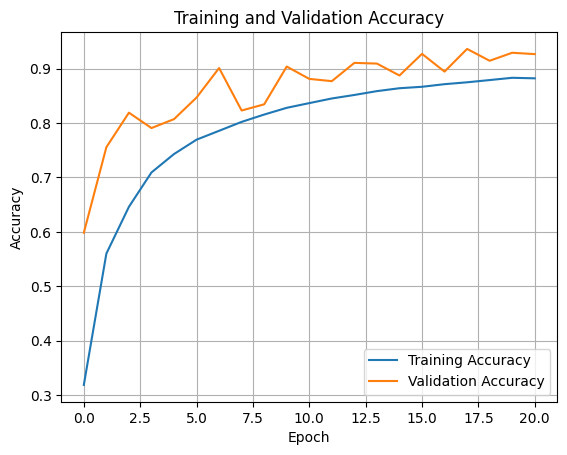

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Simpan model
model.save('CekTandur_Model.h5')

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Path ke direktori test
test_dir = 'extracted_data/test'

# Load model
model = tf.keras.models.load_model('CekTandur_Model.h5')

# Mendapatkan label kelas dari model
class_indices = train_generator.class_indices  # Mengambil mapping dari train_generator
class_labels = {v: k for k, v in class_indices.items()}  # Membalik mapping menjadi indeks ke nama kelas

# Menyiapkan gambar untuk prediksi
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Load gambar
    img_array = img_to_array(img)  # Konversi ke array
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = img_array / 255.0  # Rescale
    return img_array

# Melakukan prediksi untuk setiap gambar
for file_name in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file_name)
    if os.path.isfile(file_path):
        # Preprocessing gambar
        img_array = preprocess_image(file_path)

        # Prediksi
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_label = class_labels[predicted_class]

        # Tampilkan hasil
        print(f"Gambar: {file_name}")
        print(f"  Prediksi: {predicted_label}")
        print(f"  Probabilitas: {prediction[0][predicted_class]:.2f}")
        print("----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
Gambar: PotatoEarlyBlight2.JPG
  Prediksi: Potato___Early_blight
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gambar: TomatoEarlyBlight2.JPG
  Prediksi: Tomato___Late_blight
  Probabilitas: 0.50
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Gambar: AppleScab3.JPG
  Prediksi: Potato___Early_blight
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gambar: TomatoYellowCurlVirus3.JPG
  Prediksi: Tomato___Tomato_Yellow_Leaf_Curl_Virus
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Gambar: PotatoEarlyBlight1.JPG
  Prediksi: Potato___Early_blight
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Gambar: CornCommonRust2.JPG
  Prediksi: Corn_(maize)___Common_rust_
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Gambar: AppleScab2.JPG
  Prediksi: Apple___Apple_scab
  Probabilitas: 0.99
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Gambar: TomatoHealthy2.JPG
  Prediksi: Tomato___health